In [1]:
import sys
#!{sys.executable} -m pip install seaborn
#!{sys.executable} -m pip install pycryptodome
#!{sys.executable} -m pip install pycryptodomex
#!{sys.executable} -m pip install gnupg
import numpy as np
import importlib
import matplotlib.pyplot as plt
import scripts.theodolite_function as tfu
tfu = importlib.reload(tfu)
from scipy.interpolate import splprep, splev
from scipy import interpolate
import seaborn as sns
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
from scipy.spatial.transform import Rotation as R
import scripts.theodolite_utils as ttfu

Failed to load Python extension for LZ4 support. LZ4 compression will not be available.


In [4]:
# Read rosbag of grand axe and show the trajectory
ttfu = importlib.reload(ttfu)

#file = "/home/norlab/Data/IROS_2022/20220224_TS/2022-02-24-15-34-38.bag"
#file = "/home/norlab/Data/IROS_2022/20220307_TS/2022-03-07-19-20-06.bag"
#file = "/home/norlab/Data/IROS_2022/20220312_TS/2022-03-12-09-45-12.bag"
#file = "/home/norlab/Data/IROS_2022/20220314_TS/2022-03-14-10-47-49.bag"
file = "/home/norlab/Data/IROS_2022/20220316_TS/2022-03-16-19-02-42.bag"
#file = "/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-10-22-52.bag"  # Tree experiments
#file = "/home/norlab/Data/IROS_2022/20220331_TS/2022-03-31-11-20-05.bag"
#file = "/home/norlab/Data/IROS_2022/20220427_TS/2022-04-27-12-12-10_filered.bag"
#file = "/home/norlab/Data/IROS_2022/20220427_TS_2/2022-04-27-22-33-19_filtered.bag"
#file = "/home/norlab/Data/IROS_2022/20220505_TS/empty1_2022-05-05-19-14-33.bag"
#file = "/home/norlab/Data/IROS_2022/20220505_TS/cones1_2022-05-05-19-25-54.bag"
#file = "/home/norlab/Data/IROS_2022/20220523_TS/constrained_2022-05-23-18-56-16.bag"
#file = "/home/norlab/Data/IROS_2022/20220523_TS/empty_filtered_2022-05-23-19-18-35.bag"
#file = "/home/norlab/Data/IROS_2022/20220523_TS/cones_filtered_2022-05-23-19-31-32.bag"
#file = "/home/norlab/Data/IROS_2022/20220523_TS/other_tunnel_2022-05-23-19-39-40.bag"


time_trimble_1, time_trimble_2, time_trimble_3, trimble_1, trimble_2, trimble_3 = ttfu.read_rosbag_theodolite_without_tf(file)

Number of data for theodolites: [5680 5508 5382]
Bad measures: 459


<IPython.core.display.Javascript object>


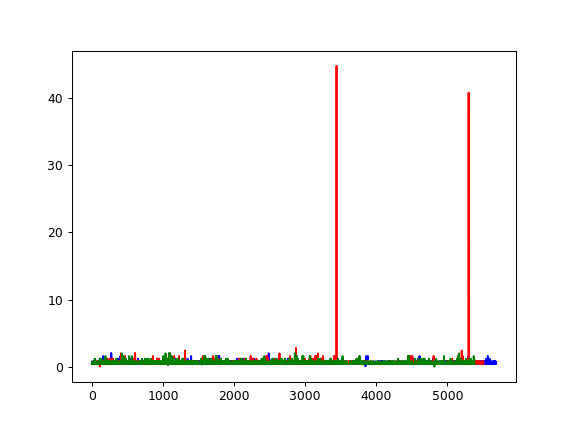

In [5]:
%matplotlib notebook
offset_timestamp = min(time_trimble_1[0],time_trimble_2[0],time_trimble_1[2])
fig, ax1 = plt.subplots() 
#ax1.scatter([(i-offset_timestamp) for i in time_trimble_1], distance_1, color='b')
#ax1.scatter([(i-offset_timestamp) for i in time_trimble_2], distance_2, color='r')
#ax1.scatter([(i-offset_timestamp) for i in time_trimble_3], distance_3, color='g')

ax1.plot([(time_trimble_1[i]-time_trimble_1[i-1]) for i in range(1,len(time_trimble_1)-1)], color='b')
ax1.plot([(time_trimble_2[i]-time_trimble_2[i-1]) for i in range(1,len(time_trimble_2)-1)], color='r')
ax1.plot([(time_trimble_3[i]-time_trimble_3[i-1]) for i in range(1,len(time_trimble_3)-1)], color='g')

#ax1.scatter([(i-offset_timestamp) for i in time_trimble_1], azimuth_1, color='b')
#ax1.scatter([(i-offset_timestamp) for i in time_trimble_2], azimuth_2, color='r')
#ax1.scatter([(i-offset_timestamp) for i in time_trimble_3], azimuth_3, color='g')

#ax2 = ax1.twinx() 
#ax2.plot([(i-offset_timestamp) for i in time_trimble_1], status_1, color='b')
#ax2.plot([(i-offset_timestamp) for i in time_trimble_2], status_2, color='r')
#ax2.plot([(i-offset_timestamp) for i in time_trimble_3], status_3, color='g')
#ax2.set_ylim(0, 4.1)
plt.show()

#plt.figure(1)
#plt.plot([(i-offset_timestamp) for i in time_trimble_1], azimuth_1, color='b')
#plt.plot([(i-offset_timestamp) for i in time_trimble_2], azimuth_2, color='r')
#plt.plot([(i-offset_timestamp) for i in time_trimble_3], azimuth_3, color='g')
#plt.figure(2)
#plt.plot([(i-offset_timestamp) for i in time_trimble_1], elevation_1, color='b')
#plt.plot([(i-offset_timestamp) for i in time_trimble_2], elevation_2, color='r')
#plt.plot([(i-offset_timestamp) for i in time_trimble_3], elevation_3, color='g')

<IPython.core.display.Javascript object>


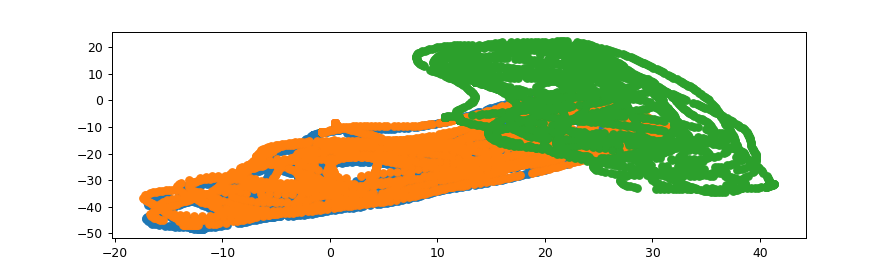

In [6]:
%matplotlib notebook
trimble_1 = np.array(trimble_1)
trimble_2 = np.array(trimble_2)
trimble_3 = np.array(trimble_3)

plt.figure(figsize=(10,3))
plt.scatter(trimble_1[:,0],trimble_1[:,1])
plt.scatter(trimble_2[:,0],trimble_2[:,1])
plt.scatter(trimble_3[:,0],trimble_3[:,1])
plt.show()

In [7]:
# Convert point data to csv file
ttfu = importlib.reload(ttfu)

# Trajectory total station (time, point data) x3
#ttfu.Convert_datap_to_csv(time_trimble_1[3630:-1], np.array(trimble_1[:,3630:-1]).T, "./data/trimble1.csv")
ttfu.Convert_datap_to_csv(time_trimble_1, np.array(trimble_1), "./data/trimble1.csv")
ttfu.Convert_datap_to_csv(time_trimble_2, np.array(trimble_2), "./data/trimble2.csv")
ttfu.Convert_datap_to_csv(time_trimble_3, np.array(trimble_3), "./data/trimble3.csv")

Conversion done !
Conversion done !
Conversion done !
